In [43]:
#Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [5]:
#Extract Filenames from Folder

In [2]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [3]:
len(filenames)

44436

In [8]:
#Importing ResNet50 Model and Cofiguration

In [11]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [50]:
#Extracting Fetaures from Image

In [6]:
img = image.load_img('C:/Users/Lenovo/OneDrive/Desktop/mini proj/images/1163.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.00491873, 0.05812978, 0.00543877, ..., 0.00351524, 0.05245368,
       0.03639517], dtype=float32)

In [3]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


array([0.        , 0.10469137, 0.00198095, ..., 0.        , 0.03033751,
       0.02712859], dtype=float32)

In [19]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
Image_features = pkl.dump(image_features, open('embeddings.pkl','wb'))

NameError: name 'image_features' is not defined

In [4]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

NameError: name 'filenames' is not defined

In [62]:
#Loading Pickle Files

In [5]:
Image_features = pkl.load(open("C:/Users/Lenovo/OneDrive/Desktop/mini proj/embeddings.pkl",'rb'))

In [6]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [7]:
np.array(Image_features).shape

(44436, 2048)

In [19]:
#Finidng Simialar Images

In [8]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [9]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [13]:
input_image = extract_features_from_images("C:/Users/Lenovo/OneDrive/Desktop/mini proj/images/1526.jpg",model)
print(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[0.         0.02540985 0.         ... 0.02201733 0.05976262 0.01438737]


In [14]:
distance,indices = neighbors.kneighbors([input_image])

In [15]:
indices[0]

array([ 4410, 41973, 43956, 23076, 12420, 34644], dtype=int64)

In [16]:
from IPython.display import Image

In [17]:
Image('16871.jpg')

FileNotFoundError: No such file or directory: '16871.jpg'

FileNotFoundError: No such file or directory: '16871.jpg'

<IPython.core.display.Image object>

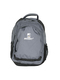

In [18]:
Image(filenames[indices[0][1]])

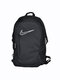

In [19]:
Image(filenames[indices[0][2]])

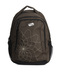

In [20]:
Image(filenames[indices[0][3]])

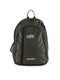

In [21]:
Image(filenames[indices[0][4]])

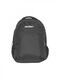

In [22]:
Image(filenames[indices[0][5]])